In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

file_path = r"../data/hotel_bookings.csv"
data = pd.read_csv(file_path)
#  查看数据的行、列
print(data.shape)

In [ ]:
# 查看数据非空数据量
data.count()

# NAN统计,county、agent、company、children中这四列出现nan数据
data.isna().sum() 

# # 数据整体描述
# data.describe()

# # 数据信息
# data.info()

# # 简单查看一下数据
# data.head()

### 数据缺失值查询与处理 
通过describe()方法看出：

children 这一列少了4个值，且均值，4分位值均为0，因此填充为0值

country、agent、company：缺失值较多，分别为488，16340，112593。

其中agent为个人用户，填充0；其余两列进行删除，后期可以考虑单独填充

In [ ]:
# # df1 为去除nan列数据
df1 = data.drop(["country", "company"],axis=1)
df1.shape

# 填充nan
df1["children"].fillna(0,inplace=True)
df1["agent"].fillna(0,inplace=True)

# 查看填充后的结果,无nan列
a = df1.isna().sum()
print(a)
print(df1.shape)

'''均值填充含nan的列
for column in list(df.columns[df.isnull().sum() > 0]):

mean_val = df[column].mean()

df[column].fillna(mean_val, inplace=True)'''
""
# list_col = list(data.columns[data.isnull().sum()>0])
# for col in  list_col:
#     print(col,list_col.index(col),"type:",type(col))

### 数据查重并处理

In [ ]:
# 查询重复行数,此方法不算第一次出现“重复行”，
# 只拿后面的行往前比，所以第一次出现的内容就不算重复行，比如一行重复了3次，那↓方法反馈sum()=2
print(df1.duplicated().sum())

# 查看哪些记录出现重复值
rep_rows = df1[df1.duplicated(keep=False)].shape[0]
print(rep_rows)

# 查看哪些重复的值，其实数量特别多，没啥意义
df1[df1.duplicated(keep=False)]

In [ ]:
# df1 = pd.read_csv("hotel_demand_df1.csv") git没保存源代码，之前我已经将数据去重复值并进行单独保存
# 此处复现去重操作
df1.drop_duplicates(keep="first",inplace=True)
print("去重后：",df1.shape)

### 异常值发现并处理

In [ ]:
# 针对数据进行异常值筛查
# 1.预定没有取消，但周中和周末天数综合=0,即客人当天入住当天退房，暂且不删除
no_days = df1[df1["is_canceled"]+df1["stays_in_weekend_nights"]+df1["stays_in_week_nights"]==0]
# 2.预定没有取消，但客人数量从成人、儿童、婴儿总和为0
no_guest = df1[df1["is_canceled"]+df1["adults"]+df1["children"]+df1["babies"]==0].index # 获取异常值index
# print(type(no_guest)) # 没有取消但是并没有人来，因此是异常值
df1.drop(no_guest,inplace=True)
# print(df1.shape)

In [ ]:
df1["meal"].unique() # 可以查看这一列有哪些值
df1["meal"].value_counts() # 可以查看这一列各类数值的求和
# 通过meal这一列维度的定义，可以发现undefined 和 SC相同，因此进行替换
df1["meal"].replace("Undefined","SC",inplace=True)
df1["meal"].value_counts() # 处理后的结果

In [ ]:
from matplotlib import font_manager
# 为画图做准备
warnings.filterwarnings("ignore")

# 设置中文字体类型
# Mac
# my_font = font_manager.FontProperties(fname='/System/Library/Fonts/PingFang.ttc',size=10)
# Windows
my_font = font_manager.FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc',size=10)
# 使用中文字体显示
plt.rcParams["font.sans-serif"] = "PingFang"
# 正常显示负数
plt.rcParams["axes.unicode_minus"] = False
pd.set_option("display.max_columns",36)

## 酒店基本情况分析
对取消的订单进行处理，即排除被取消的预定需求

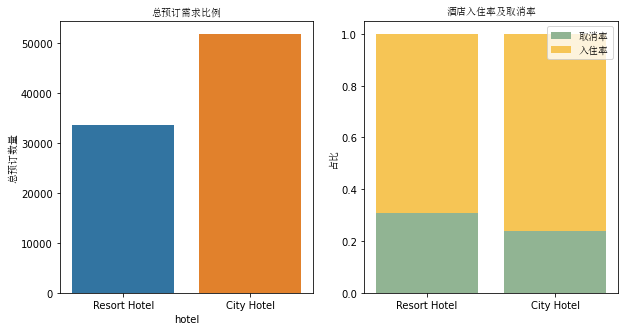

In [283]:
# 1.总订单量的分析
# 1.1 对比两类酒店，取消订单与未取消订单，loc方法本身需要传[“行”，“列”]参数，既可以是数值也可以是名称
nocancel_data = df1.loc[df1["is_canceled"]==0] # loc方法可以采用条件筛选
cancel_data = df1.loc[df1["is_canceled"]==1]
# nocancel_data.head()
# nocancel_data_hotel = df1.loc[df1["is_canceled"]==0,["hotel","is_canceled"]] # 条件 + 列名
# nocancel_data_hotel.head()

# 非取消占比,分别用城市酒店与度假酒店进行数据对比
nocancel_percent = nocancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
nocancel_percent_2list = list(nocancel_percent)
cancel_percent = cancel_data["hotel"].value_counts()/df1["hotel"].value_counts() # series类型
cancel_percent_2list = list(cancel_percent) # 之所以变成list类型，因为下面画图参数需要

fig,axes = plt.subplots(1,2,figsize=(10,5))
ax1 = sns.countplot(x="hotel",data=df1,ax=axes[0]) 
# countplot(),是计数画图工具，在第0张画布上，x方向代表hotel，hotel必须是后面data的列元素，data是要统计的数据，
# 整体理解：以df1作为data数据，从data中抽取“hotel”，进行分类和统计，最终画在axes[0]这张画布上

ax1.set_title("总预订需求比例",fontproperties=my_font)
ax1.set_ylabel("总预订数量",fontproperties=my_font)

ax2 = plt.bar([1,2],cancel_percent_2list,tick_label=["Resort Hotel","City Hotel"],color="#91b493",label="取消率")
# plt.bar([x轴坐标范围]，数据内容，x轴坐标注释（显示），bar颜色，label图例注释)，其中数据内容是关键
ax2 = plt.bar([1,2],nocancel_percent_2list,bottom=cancel_percent_2list,color="#F6C555",label="入住率")
plt.title("酒店入住率及取消率",fontproperties=my_font)
plt.ylabel("占比",fontproperties=my_font)
plt.legend(prop=my_font)

### 从上图可以看出，城市酒店比度假酒店的总预定量要大，
### 对比入住/取消率可以看出城市酒店的入住率要更高，这可能与城市酒店所在的区域以及满足人们需求的各项功能相关

<function matplotlib.pyplot.show(close=None, block=None)>

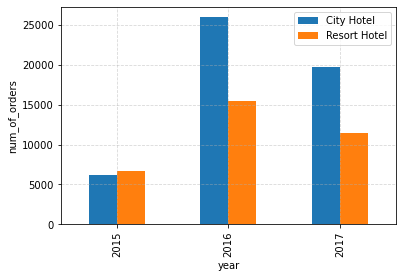

In [284]:
# 2.最简单的统计分析，2015-2017年两类酒店每年预订的总数是多少
# 按照hotel和arrival_date_year来进行分组,并hotel这列计数
group_by_hotel_year = df1.groupby(["hotel","arrival_date_year"])["hotel"].count()
# print(group_by_hotel_year.count())
# print(type(group_by_hotel_year))
# print(group_by_hotel_year)

C_2015 = group_by_hotel_year["City Hotel"][2015]
groups_by_h_y = df1.groupby(["hotel","arrival_date_year"])
# 定义年份和订单总量，两个列表
years = list()
hotel_orders_total_count = list()
for hotel,group in groups_by_h_y:
#     print(hotel)
    years.append(hotel[1])
#     print("-"*40)
#     print(group["arrival_date_year"].count())
    hotel_orders_total_count.append(int(group["arrival_date_year"].count()))
# print(years[:3])
# print(hotel_orders_total_count)
years = years[:3]
City_Hotel_orders = hotel_orders_total_count[:3]
Resort_Hotel_orders = hotel_orders_total_count[3:]
s = pd.DataFrame(
    {"City Hotel":City_Hotel_orders,
     "Resort Hotel":Resort_Hotel_orders
    },
    index=years
    )
s.plot(kind="bar")
plt.grid(linestyle="--",alpha=0.5)
plt.xlabel("year")
plt.ylabel("num_of_orders")
plt.show

In [ ]:
# 上述图片没有数据标签，不太好看，我们考虑另一种办法添加数据标签
# # 使用hist画直方图
# plt.hist([City_Hotel_orders,Resort_Hotel_orders],bins,label=["City Hotel","Resort Hotel"])
# plt.show()  这一部分比较耽误时间，暂且放置一旁

### 由上图我们可以看出，2015年城市酒店比度假酒店预定量要少，而之后的2016与2017年城市酒店比度假酒店的预定量有明显的增多



In [ ]:
nocancel_data.head

In [ ]:
# 查看"arrival_date_year"这一列有多少年
# nocancel_data["arrival_date_year"].unique() 显示2015、2016、2017年

# 查看这3年，每月的入住量走势图，
# 试了很多办法，最终决定给nocancel_data增加一列时间序列

  # 1.将nocancel_data["arrival_date_month"] 这一列换成数字形式,这里注意，换完之后就不要在运行这段了
month2num = {"January":"1","February":"2","March":"3","April":"4","May":"5","June":"6","July":"7","August":"8","September":"9","October":"10","November":"11","December":"12"}
a = nocancel_data["arrival_date_month"]
for i in list(a.index):
    a[i] = a[i].replace(a[i],month2num[a[i]])
print(nocancel_data["arrival_date_month"])

In [ ]:
  # 2.对dataframe中的arrival_date_*这几列进行拼接 arrival_date_year, arrival_date_month,arrival_date_day_of_month
def To_ten_digit(args):
    '''
        将不足两位的数据调整为两位数，即3变为03
    '''
    if int(args) < 10:
        return "0"+str(args)
    else:
        return str(args)
    
nocancel_data["arrival_date_year"] = nocancel_data["arrival_date_year"].apply(To_ten_digit)
nocancel_data["arrival_date_month"] = nocancel_data["arrival_date_month"].apply(To_ten_digit)
nocancel_data["arrival_date_day_of_month"] = (nocancel_data["arrival_date_day_of_month"]
                                              .apply(To_ten_digit))

nocancel_data["arrival_date"] = (nocancel_data["arrival_date_year"]
                                +"-"+nocancel_data["arrival_date_month"]
                                +"-"+nocancel_data["arrival_date_day_of_month"])
print(nocancel_data["arrival_date"])

In [ ]:
    # 3. 通过上述arrival_date查看所有
nocancel_data["arrival_date"] = pd.to_datetime(nocancel_data["arrival_date"])
nocancel_data.head
nocancel_data.loc[0,"arrival_date"]

In [ ]:
y_m_data = nocancel_data.groupby([nocancel_data["hotel"],
                                  nocancel_data["arrival_date"].dt.year,
                                  nocancel_data["arrival_date"].dt.month]
                                 )["is_canceled"].count()


# 通过分组发现，日期为2015年7月 - 2017年8月，可以以此提取City Hotel，Resort Hotel的月变化数据
years = [2015, 2016, 2017]
months = list(range(1,13))
date_list = []

C_H_list = list()
R_H_list = list()
for i in years:
    if i == 2015:
        for j in months[6:]:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
    elif i == 2016:
        for j in months:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
    else:
        for j in months[:8]:
            date_list.append(str(i)+"-"+str(j))
            C_H_list.append(y_m_data.loc["City Hotel"][i][j])
            R_H_list.append(y_m_data.loc["Resort Hotel"][i][j])
print(C_H_list)
print("-"*50)
print(date_list)
print("-"*50)
print(R_H_list)

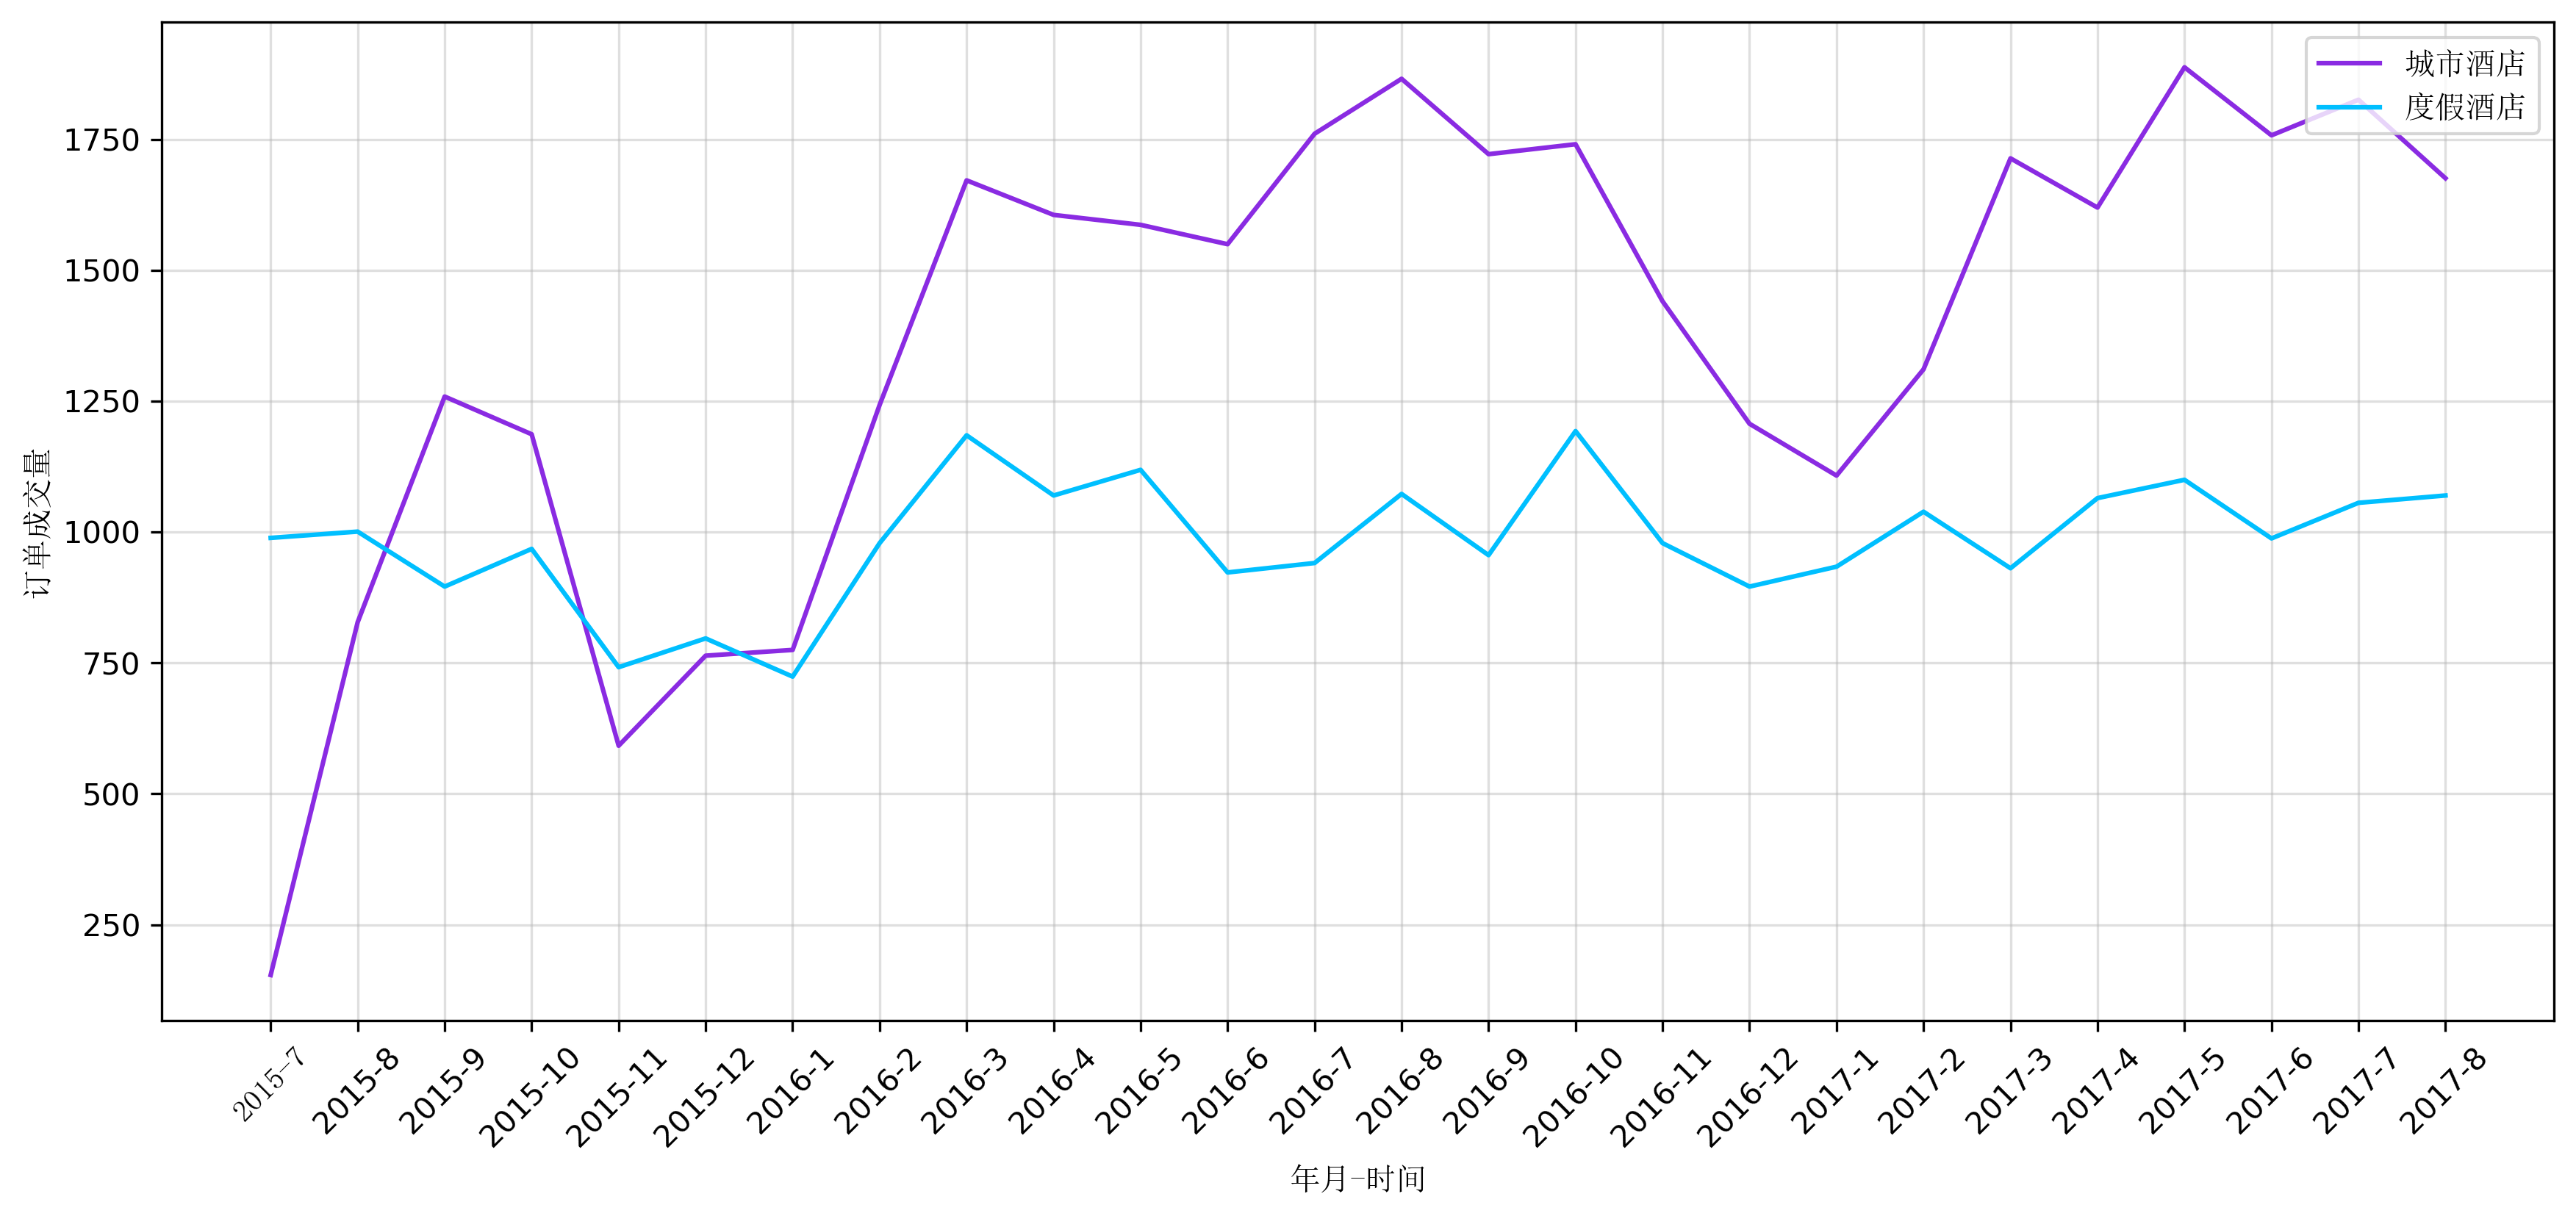

In [285]:
x = range(0,len(date_list))
plt.figure(figsize=(14,6),dpi=300)
plt.plot(x,C_H_list,label="城市酒店",color="blueviolet")
plt.plot(x,R_H_list,label="度假酒店",color="deepskyblue")
# 好看的matplotlib配色 见：https://zhuanlan.zhihu.com/p/65220518

plt.xticks(x[::1],date_list[::1],rotation=45,fontproperties=my_font)
plt.xlabel("年月-时间",fontproperties=my_font)
plt.ylabel("订单成交量",fontproperties=my_font)
plt.grid(alpha=0.4,linestyle="-")
plt.legend(prop=my_font,loc="upper right")
plt.show()

### 通过上图可以看出，城市酒店相较于度假酒店的预定成交量高，
#### 每年11月至次年2月是城市酒店的预订成交的淡季
#### 度假酒店的预定成交量较为平稳
#### 2015年11月-12月呈现明显减少趋势，可以结合各种因素分析是何种原因导致

## 用户行为分析

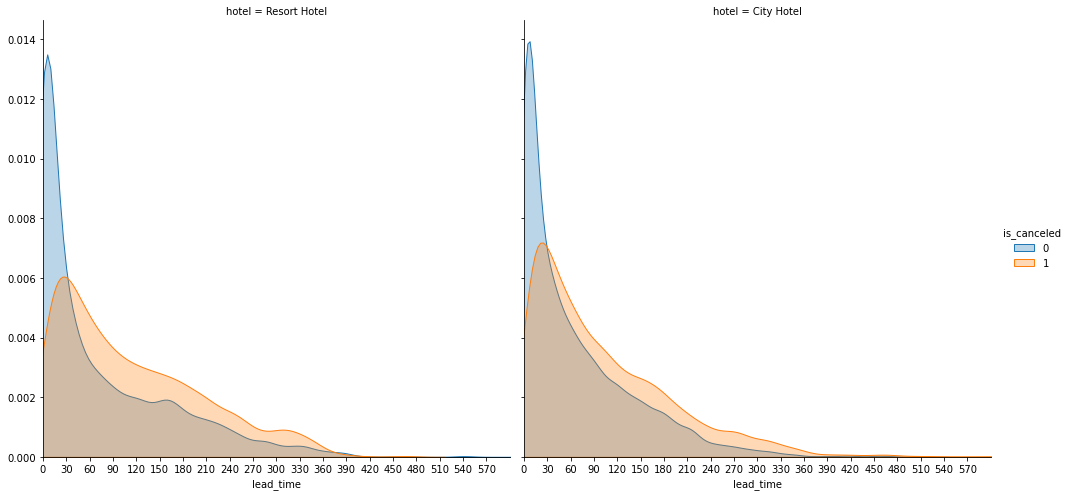

In [282]:
# 考察用户提前预定天数与取消与否的关系
is_canceled_plt=sns.FacetGrid(df1,col='hotel',hue='is_canceled',height=7,xlim=(0,600)).set(xticks=np.arange(0,600,30))
# sns.FacetGrid.
is_canceled_plt.map(sns.kdeplot,'lead_time',shade=True,alpha=0.3)
is_canceled_plt.add_legend()


### 通过上图可以看到城市酒店与度假酒店提前预定的时长与最终订单被取消的关系一致
1.预定日期小于30天的客户，倾向于不取消订单
2.预定的天数大于某值时（30-50天），客户取消预定的可能性变大

In [ ]:
# 考察未取消订单的，月预定趋势，通过上面的数据可以看出，7、8俩月重复了3次，其余月份重复了2次，我们统计每月的平均预定量
month_data = nocancel_data.groupby(["hotel","arrival_date_month"])["hotel"].count()
month_data.loc[(month_data.index==7)|(month_data.index==8)] /= 3
month_data.loc[~(month_data.index==7)|(month_data.index==8)] /= 2
month_data.head

<bound method IndexOpsMixin.tolist of Index(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], dtype='object', name='arrival_date_month')>
<class 'list'>
['City Hotel', 'Resort Hotel']


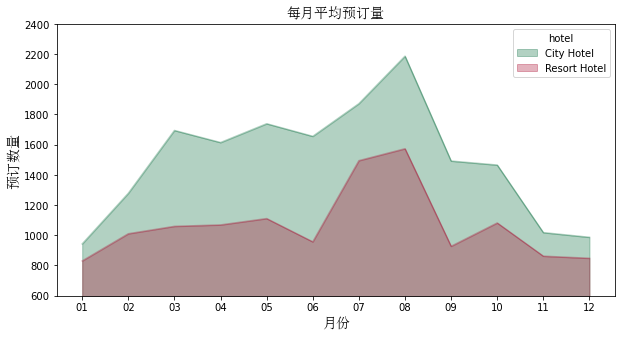

In [280]:
# 画面积图
a = month_data.unstack()   # 将series变成一个二维dataframe类型
a.shape
a.head

a = a.T
print(a.index.tolist)
b = a.index.tolist()

print(type(b))
print(a.columns.tolist())  # 
a.plot.area(stacked=False,alpha=0.3,colormap='RdYlGn_r',figsize=(10, 5),ylim=(600,2400))
plt.title('每月平均预订量', fontsize=14,fontproperties=my_font)
plt.xlabel('月份', fontsize=14,fontproperties=my_font)
plt.xticks(list(range(0,12))[::1],b[::1])
plt.ylabel('预订数量', fontsize=14,fontproperties=my_font)
plt.show()


### 通过上图可以看出，7、8月份是入住高峰，每年12月至次年1月入住量明显下降
两类酒店的波动都很大，且变化趋势一致